This notebook will demonstrate that how we can use image prior contained in the structure of the network and train the network on that single image to get closest to the original image.

In [ ]:
# When running in google colab uncomment following lines.

!git clone https://github.com/Divyansh9125/EE-769-Course-Project---Deep-Image-Prior
!mv EE-769-Course-Project---Deep-Image-Prior/* ./

Cloning into 'EE-769-Course-Project---Deep-Image-Prior'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 77 (delta 24), reused 31 (delta 5), pack-reused 0
Unpacking objects: 100% (77/77), done.


In [ ]:
from __future__ import print_function
%matplotlib inline 

import os
import numpy as np
from models import *

# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import torch.optim

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

from skimage.measure import compare_psnr
from skimage.metrics import peak_signal_noise_ratio
from denoising_utility import *

In [ ]:
imsize =-1
PLOT = True
sigma = 50
sigma_ = sigma/255.

In [ ]:
img_path = 'data/original.png'

## Loading Image

Original Image: 


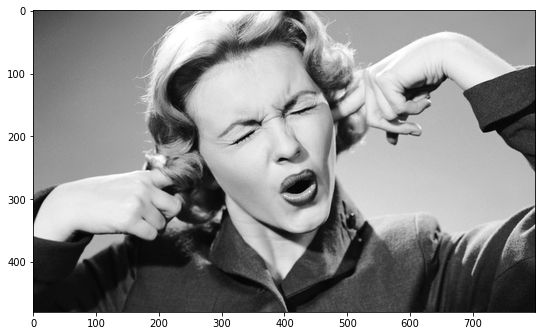


Noised Image: 


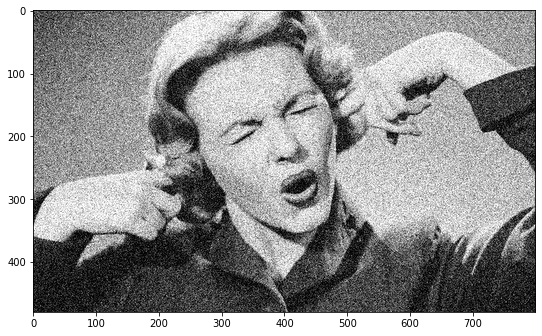

In [ ]:
img_pil = crop_image(get_image(img_path, imsize)[0], d=16)
img_np = pil_to_np(img_pil) # converting PIL image to np array
img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_) #adding noise to the original image
if PLOT:
  print('Original Image: ')
  plot_image_grid([img_np], 1, 8);
  print('\nNoised Image: ')
  plot_image_grid([img_noisy_np], 1, 8);

## Training

In [26]:
INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'

reg_noise_std = 1./20. # set to 1./20. for sigma=50
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99

num_iter = 2500
input_depth = 1
figsize = 8

# creates a convolutional network with skip connections
net = get_net(input_depth, 'skip', pad, n_channels=1,
              skip_n33d=128, skip_n33u=128, skip_n11=4, 
              num_scales=5, upsample_mode='bilinear').type(dtype)


# get initial noised image (random) from which the network will try and build up output image
# denoted as z in the paper
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]); 

print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_noisy_np).type(dtype) # converting np array to torch tensor

Number of params: 2181737


Starting optimization with ADAM


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_r



After 0 iterations: 
Iteration 00000    Loss 0.101803   PSNR_noisy: 9.922375   PSRN_gt: 10.754249   PSNR_gt_sm: 10.754249 


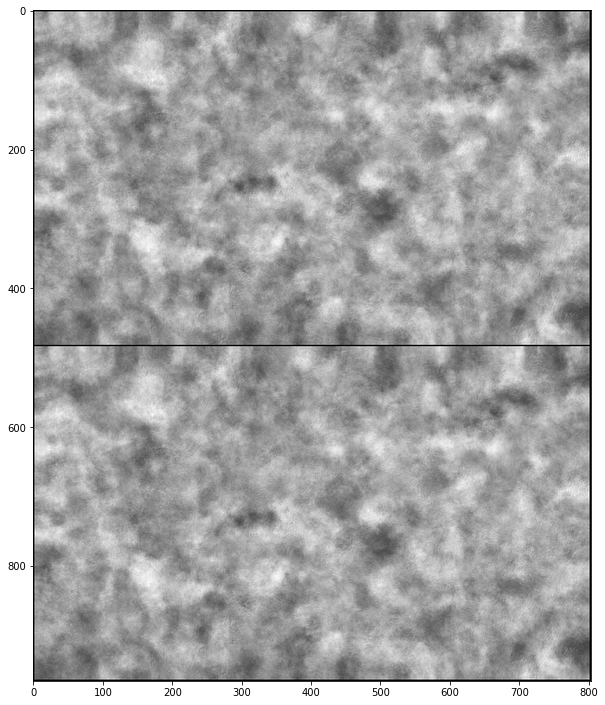



After 100 iterations: 
Iteration 00100    Loss 0.053450   PSNR_noisy: 12.720533   PSRN_gt: 15.450913   PSNR_gt_sm: 13.815113 


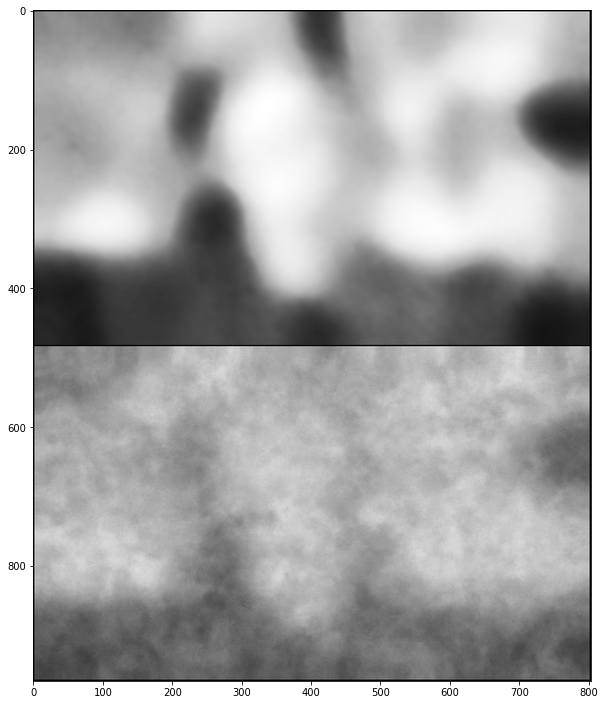



After 200 iterations: 
Iteration 00200    Loss 0.047579   PSNR_noisy: 13.225810   PSRN_gt: 16.755549   PSNR_gt_sm: 16.245314 


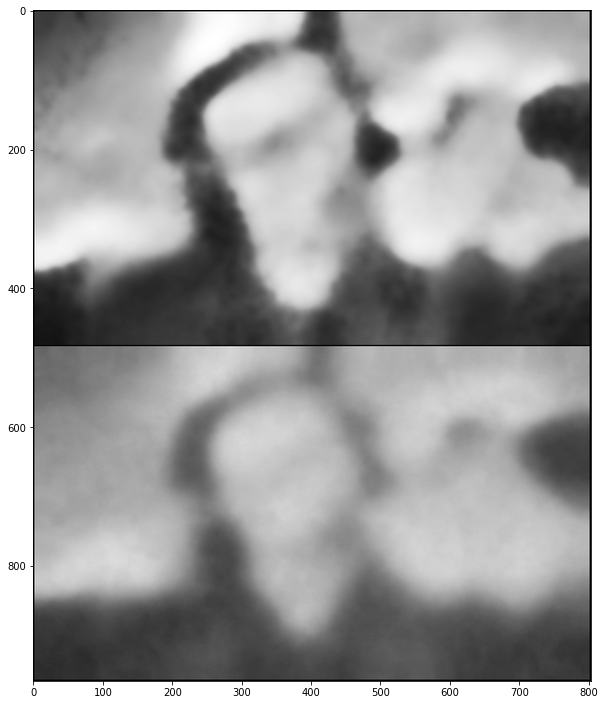



After 300 iterations: 
Iteration 00300    Loss 0.041084   PSNR_noisy: 13.863306   PSRN_gt: 18.536499   PSNR_gt_sm: 18.114943 


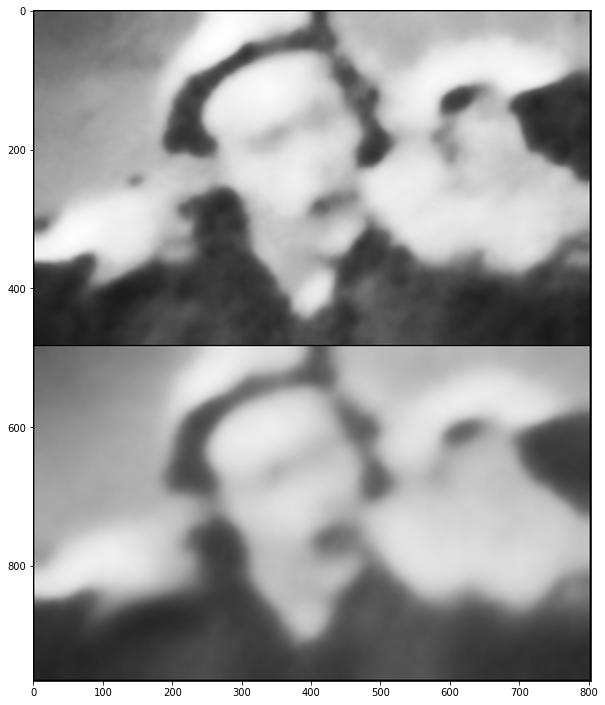



After 400 iterations: 
Iteration 00400    Loss 0.037623   PSNR_noisy: 14.245503   PSRN_gt: 19.975568   PSNR_gt_sm: 19.566625 


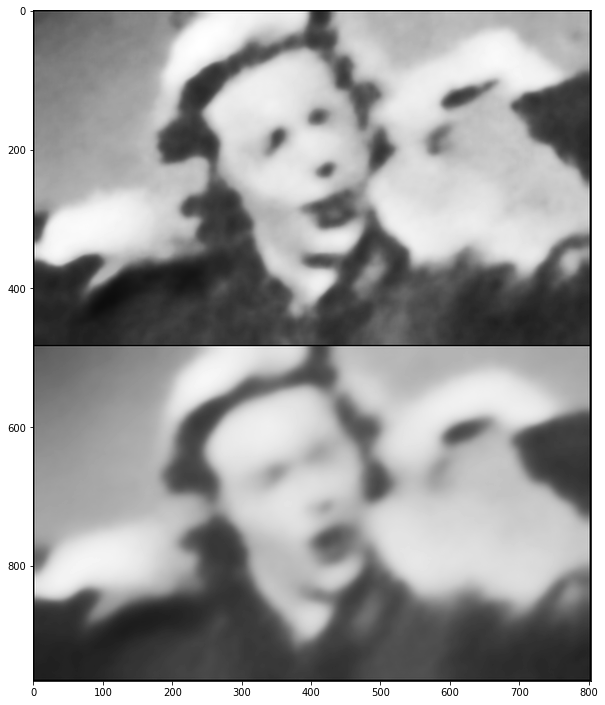



After 500 iterations: 
Iteration 00500    Loss 0.036711   PSNR_noisy: 14.351998   PSRN_gt: 20.451517   PSNR_gt_sm: 20.733414 


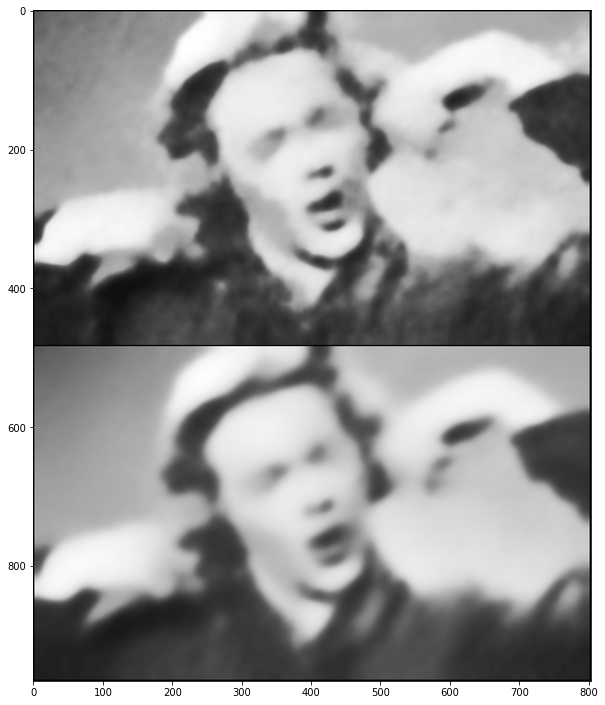



After 600 iterations: 
Iteration 00600    Loss 0.035136   PSNR_noisy: 14.542522   PSRN_gt: 21.403802   PSNR_gt_sm: 21.660397 


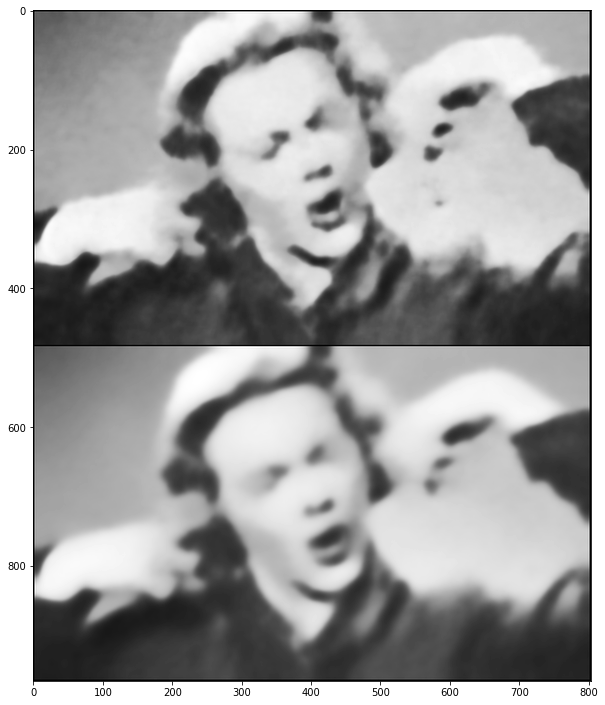



After 700 iterations: 
Iteration 00700    Loss 0.034143   PSNR_noisy: 14.666966   PSRN_gt: 22.276367   PSNR_gt_sm: 22.453693 


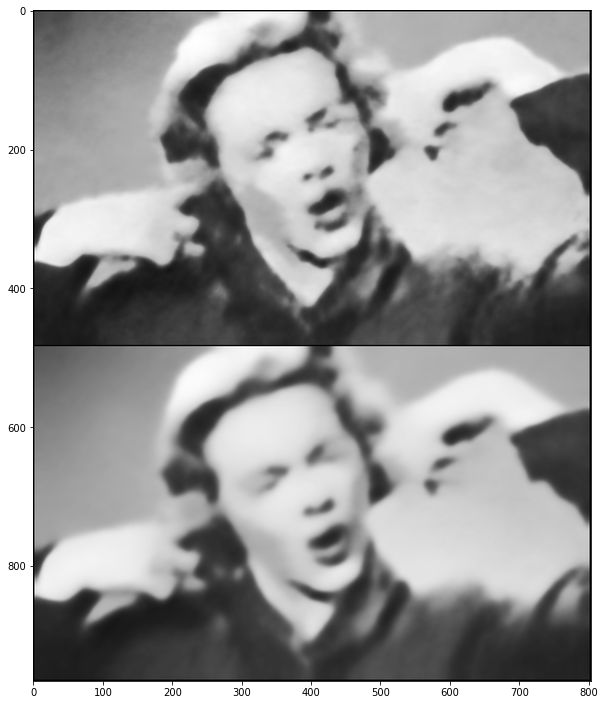



After 800 iterations: 
Iteration 00800    Loss 0.033541   PSNR_noisy: 14.744196   PSRN_gt: 22.744407   PSNR_gt_sm: 23.183725 


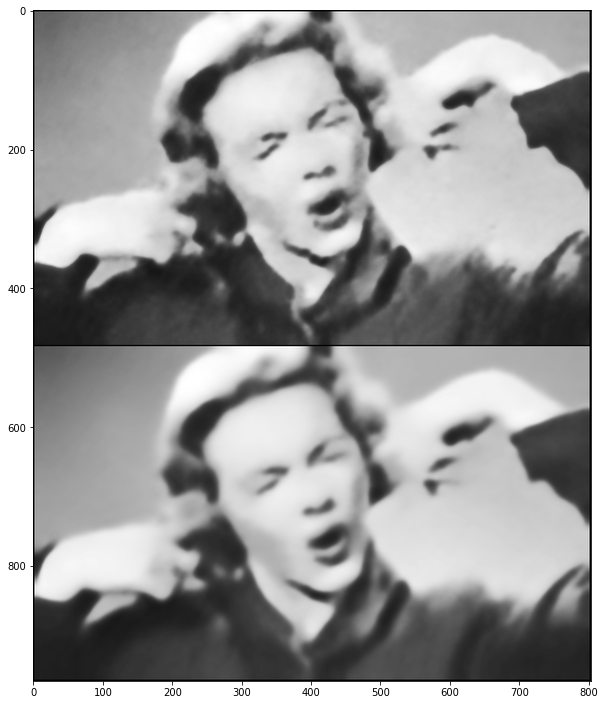



After 900 iterations: 
Iteration 00900    Loss 0.032943   PSNR_noisy: 14.822422   PSRN_gt: 23.496688   PSNR_gt_sm: 23.879495 


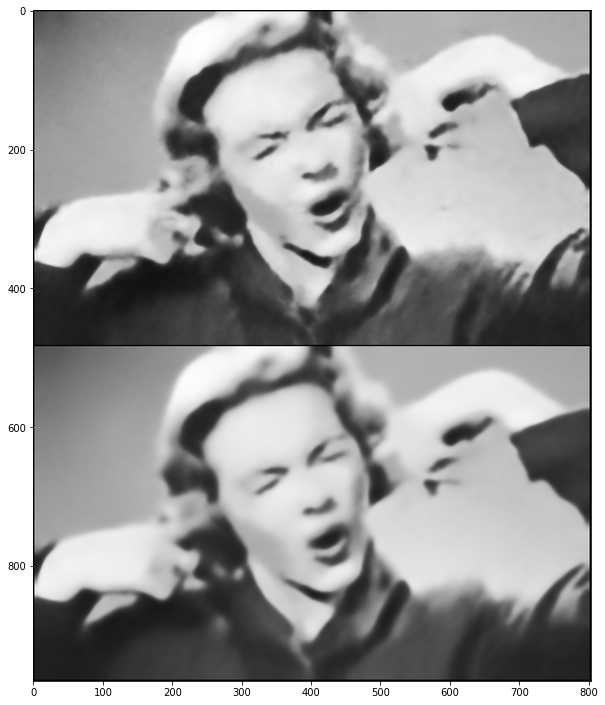



After 1000 iterations: 
Iteration 01000    Loss 0.032268   PSNR_noisy: 14.912228   PSRN_gt: 24.074967   PSNR_gt_sm: 24.551376 


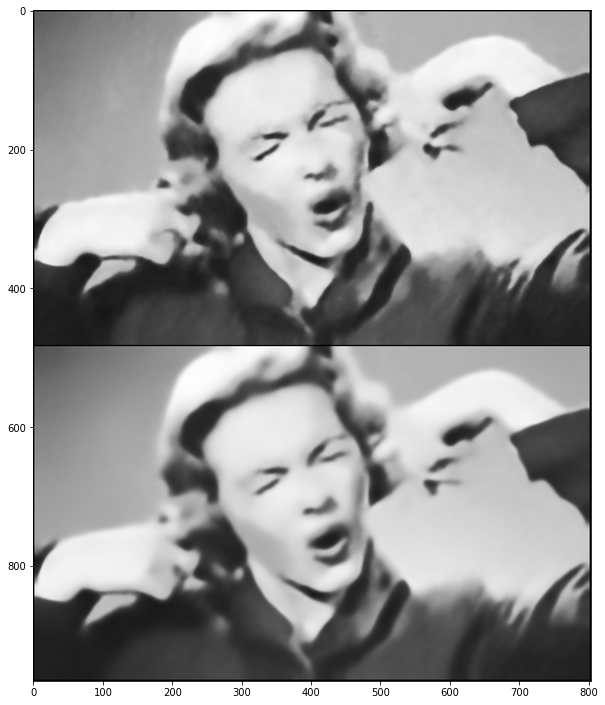



After 1100 iterations: 
Iteration 01100    Loss 0.032111   PSNR_noisy: 14.933399   PSRN_gt: 24.221502   PSNR_gt_sm: 25.073779 


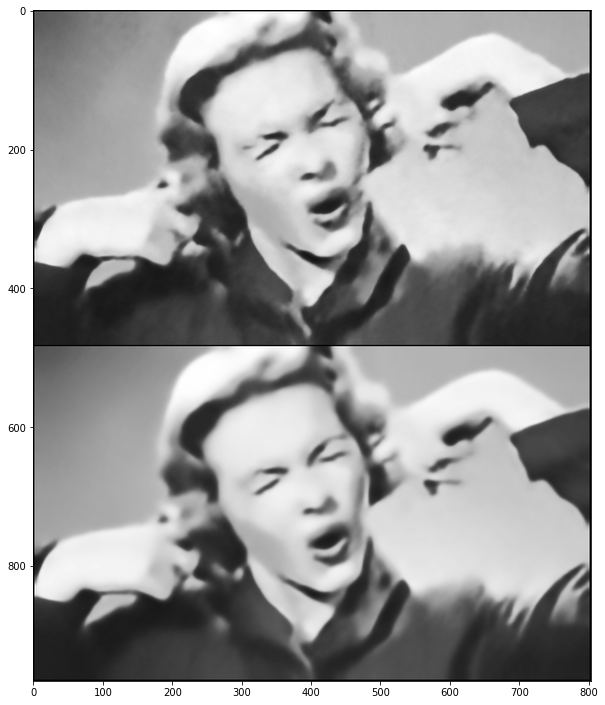



After 1200 iterations: 
Iteration 01200    Loss 0.031621   PSNR_noisy: 15.000308   PSRN_gt: 24.724902   PSNR_gt_sm: 25.558001 


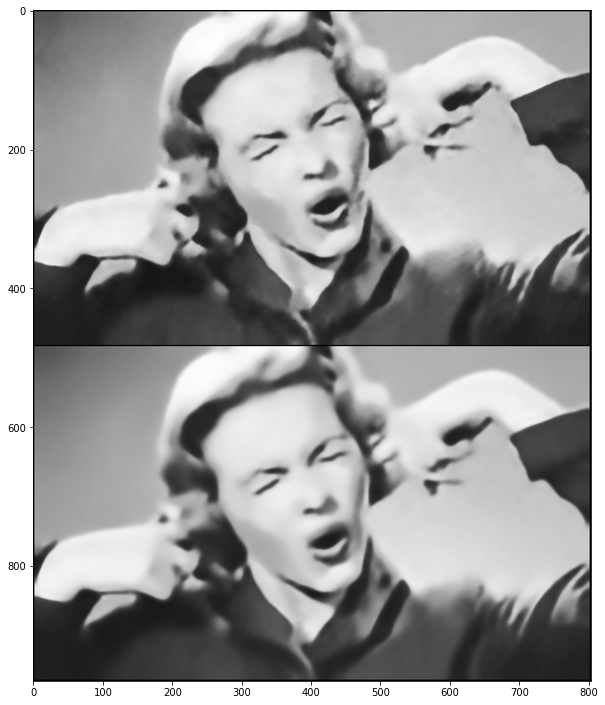



After 1300 iterations: 
Iteration 01300    Loss 0.031396   PSNR_noisy: 15.031252   PSRN_gt: 25.299013   PSNR_gt_sm: 25.959942 


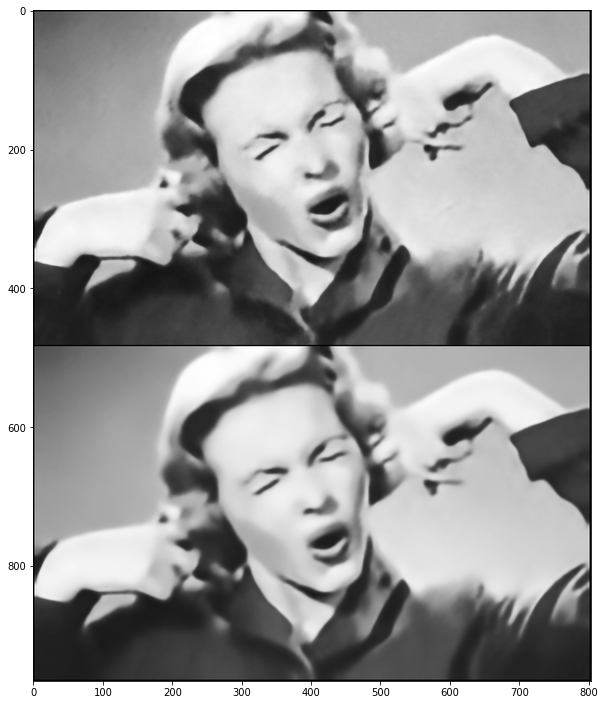



After 1400 iterations: 
Iteration 01400    Loss 0.031166   PSNR_noisy: 15.063166   PSRN_gt: 25.441176   PSNR_gt_sm: 26.320704 


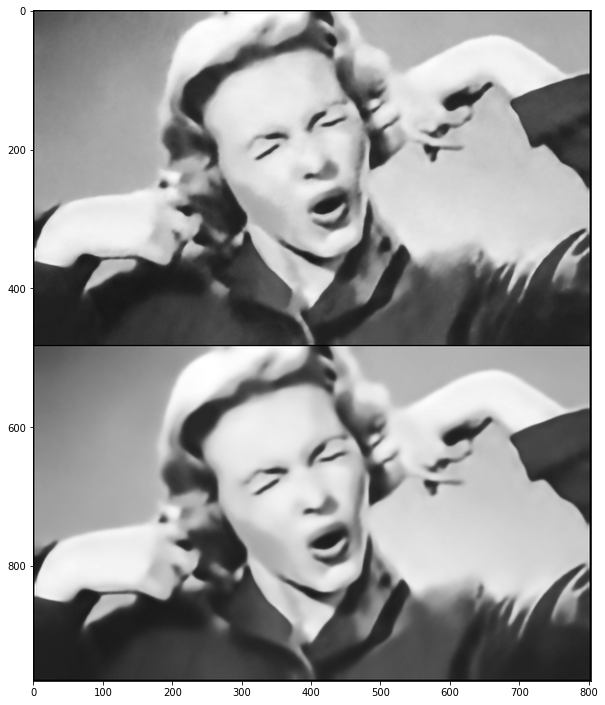



After 1500 iterations: 
Iteration 01500    Loss 0.031077   PSNR_noisy: 15.075600   PSRN_gt: 25.691043   PSNR_gt_sm: 26.619081 


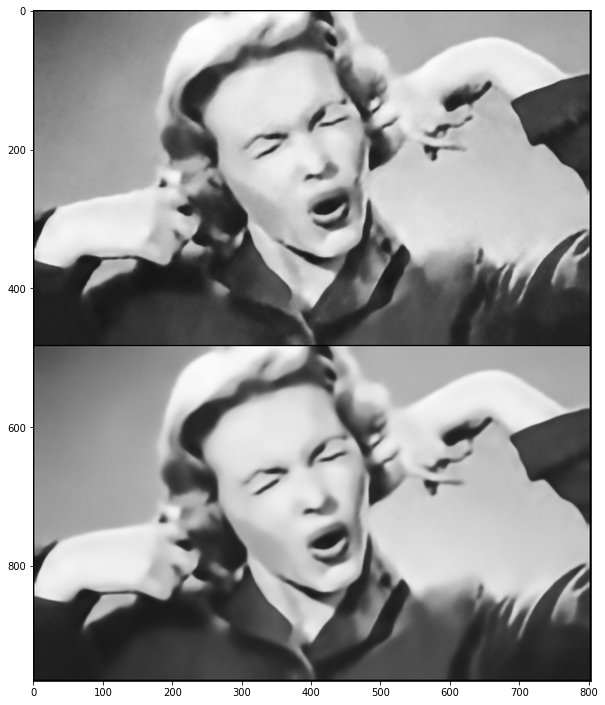



After 1600 iterations: 
Iteration 01600    Loss 0.030862   PSNR_noisy: 15.105803   PSRN_gt: 26.177145   PSNR_gt_sm: 26.903507 


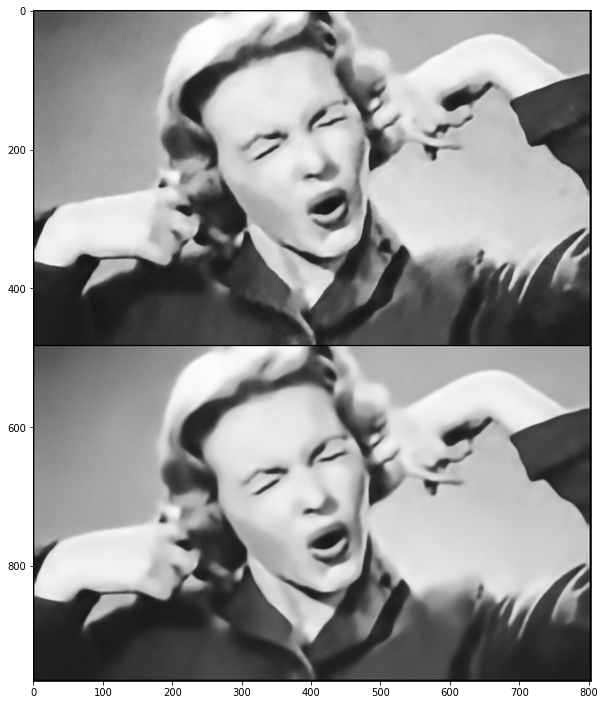



After 1700 iterations: 
Iteration 01700    Loss 0.030745   PSNR_noisy: 15.122263   PSRN_gt: 26.186455   PSNR_gt_sm: 27.146304 


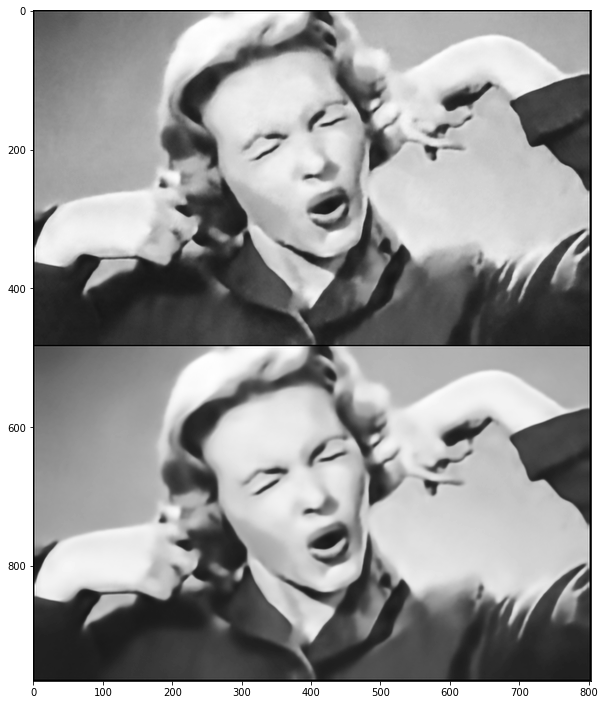



After 1800 iterations: 
Iteration 01800    Loss 0.030539   PSNR_noisy: 15.151464   PSRN_gt: 26.499048   PSNR_gt_sm: 27.352925 


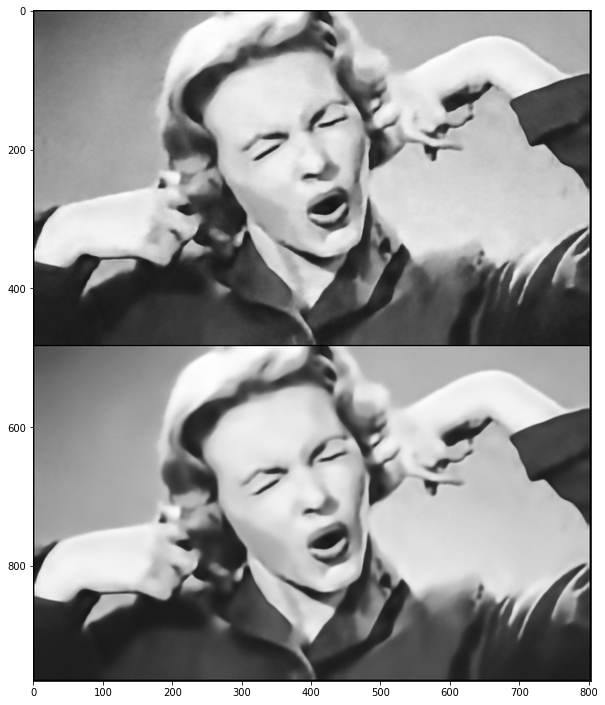



After 1900 iterations: 
Iteration 01900    Loss 0.030439   PSNR_noisy: 15.165645   PSRN_gt: 26.656333   PSNR_gt_sm: 27.521812 


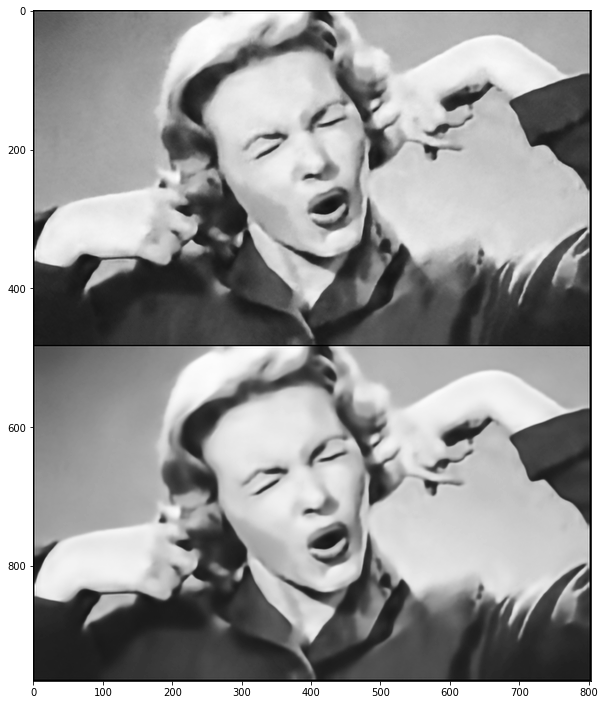



After 2000 iterations: 
Iteration 02000    Loss 0.030427   PSNR_noisy: 15.167468   PSRN_gt: 26.626132   PSNR_gt_sm: 27.673457 


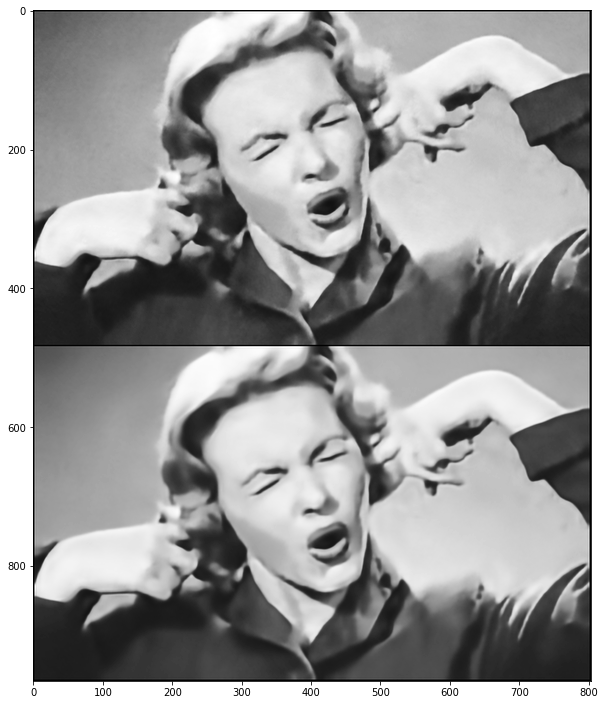



After 2100 iterations: 
Iteration 02100    Loss 0.030211   PSNR_noisy: 15.198409   PSRN_gt: 26.957386   PSNR_gt_sm: 27.798483 


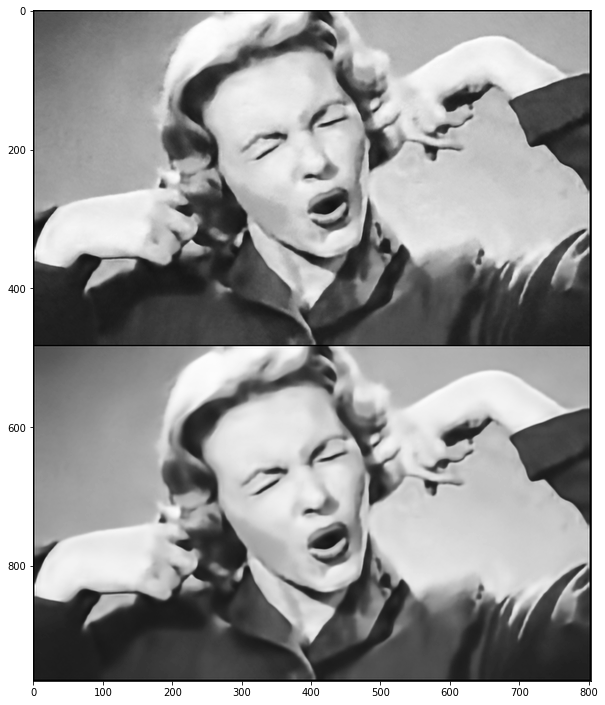



After 2200 iterations: 
Iteration 02200    Loss 0.030120   PSNR_noisy: 15.211497   PSRN_gt: 27.305142   PSNR_gt_sm: 27.914389 


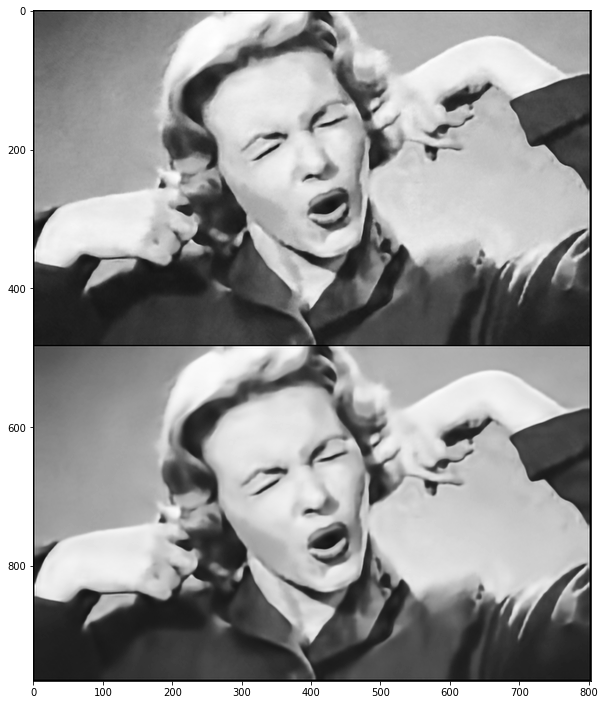



After 2300 iterations: 
Iteration 02300    Loss 0.030073   PSNR_noisy: 15.218278   PSRN_gt: 27.305888   PSNR_gt_sm: 27.991745 


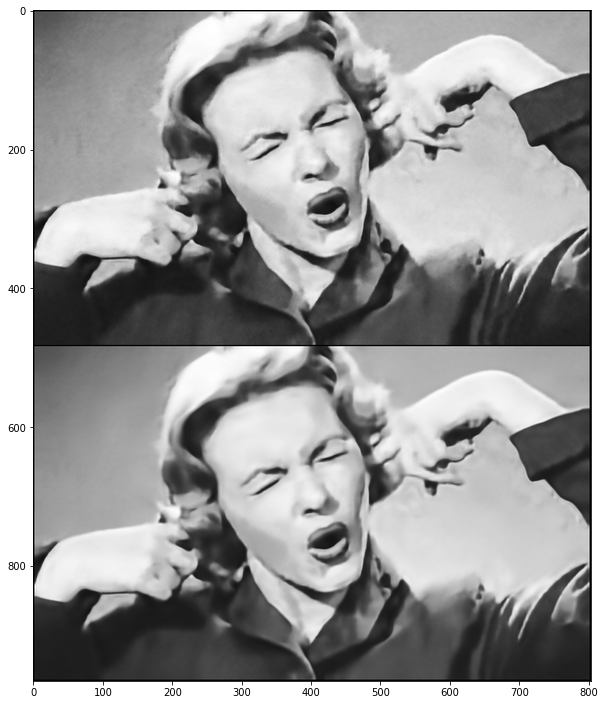



After 2400 iterations: 
Iteration 02400    Loss 0.029934   PSNR_noisy: 15.238343   PSRN_gt: 27.292286   PSNR_gt_sm: 28.049319 


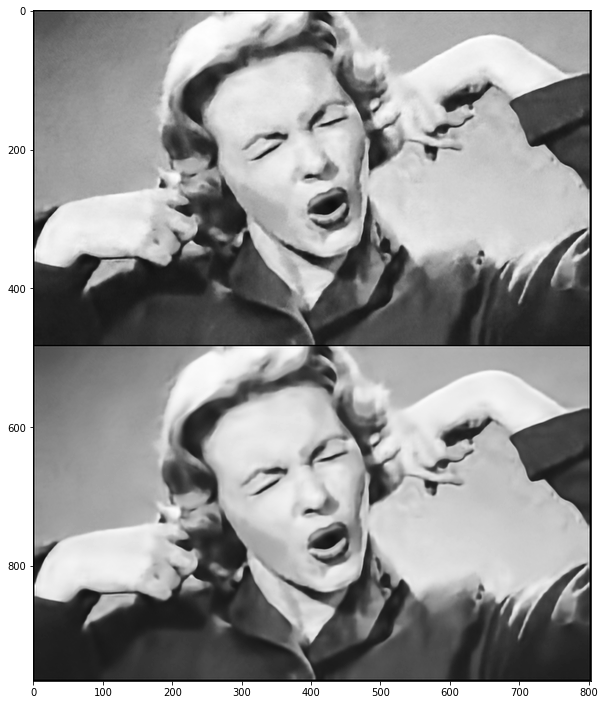

In [27]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
out_avg = None
last_net = None
psrn_noisy_last = 0
loss = []
psnr_output = []

i = 0
def optimization_fun():
    
    global i, out_avg, psrn_noisy_last, last_net, net_input, loss
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std) #changing the input to the netwok
    
    out = net(net_input)
    
    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight) # calculating average network output
            
    total_loss = mse(out, img_noisy_torch)
    total_loss.backward()

    loss.append(total_loss.item())
    psnr_output.append(peak_signal_noise_ratio(image_test=out.detach().cpu().numpy()[0], image_true=img_np))
        
    
    # caculating psrn
    psrn_noisy = compare_psnr(img_noisy_np, out.detach().cpu().numpy()[0]) # comparing psnr for the output image and the actual noisy image 
    psrn_gt    = compare_psnr(img_np, out.detach().cpu().numpy()[0]) # comparing psnr for the output image and the original image 
    psrn_gt_sm = compare_psnr(img_np, out_avg.detach().cpu().numpy()[0]) # comparing psnr for the output average and the original image 
    
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        # plotting the output image along the average image calculated
        print(f'\n\nAfter {i} iterations: ')
        print ('Iteration %05d    Loss %f   PSNR_noisy: %f   PSRN_gt: %f   PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_noisy, psrn_gt, psrn_gt_sm), '\r', end='\n')
        plot_image_grid([np.clip(out_np, 0, 1), 
                         np.clip(torch_to_np(out_avg), 0, 1)], factor=figsize, nrow=1)
        
        
    
    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5: 
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy
            
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, optimization_fun, LR, num_iter)

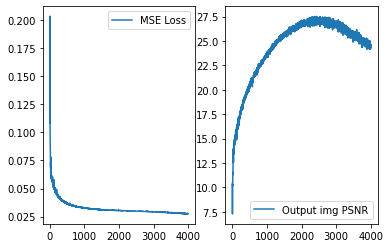

In [25]:
# Plotting the loss and psnr of output image as a function of number of iterations for previous training excersize
itr = [i for i in range(num_iter)]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) # two axes on figure

ax1.plot(itr, loss)
ax1.legend(['MSE Loss'])

ax2.plot(itr, psnr_output)
ax2.legend(['Output img PSNR']) # output image psnr compared to ground truth

plt.show()

We don't want the network to overfit the noised image and the mse loss to be so small that's we stop pretty early. </br>
We can see that the psnr attains maximum around 2500 iterations. So, we can conclude that running for 2500 iteration will give us much clearer image.

## Output

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Output Image from the network: 


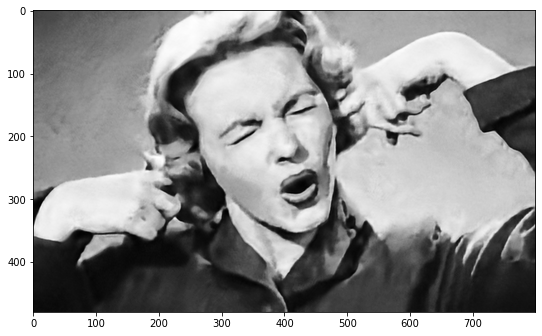


Noised Image: 


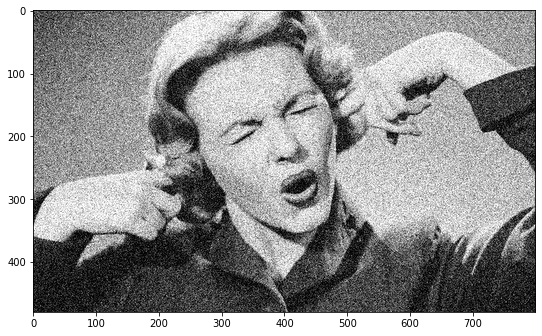


Original Image: 


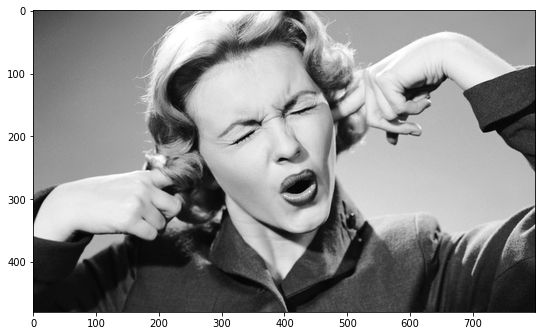

In [28]:
out_np = torch_to_np(net(net_input))

print('Output Image from the network: ')
plot_image_grid([np.clip(out_np, 0, 1)], factor=8);

print('\nNoised Image: ')
plot_image_grid([img_noisy_np], factor=8);

print('\nOriginal Image: ')
plot_image_grid([img_np], factor=8);